In [3]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        #classLabels.append(fpt.read())

In [5]:
def out(img):
    classIndex, confidece, bbox = model.detect(img,confThreshold=0.5)
    font_scale = 1
    font = cv2.FONT_HERSHEY_PLAIN
    for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
        cv2.rectangle(img,boxes,(255, 0, 0), 2 )
        cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

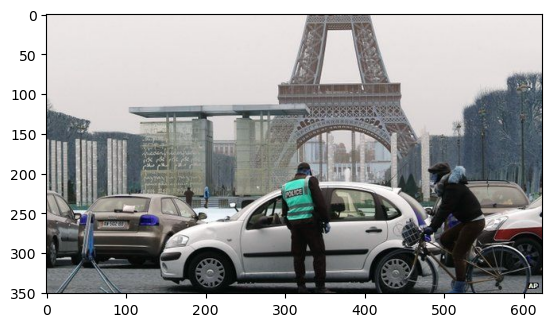

In [6]:
img = cv2.imread('trafficpicture.jpg')
plt.imshow(img)

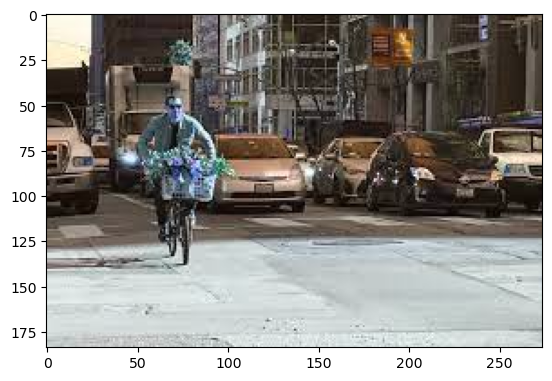

In [7]:
img1 = cv2.imread('image.jfif')
plt.imshow(img1)

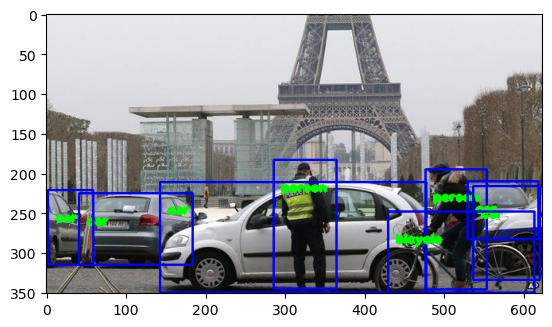

In [8]:
out(img)

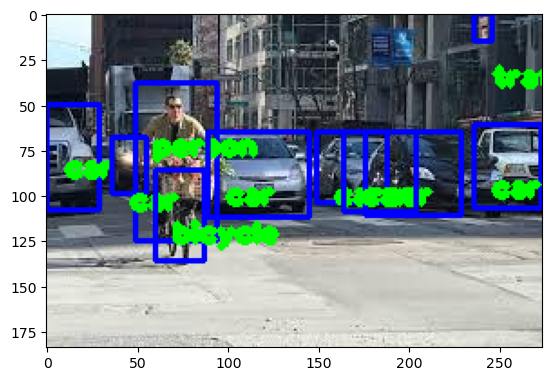

In [9]:
out(img1)

In [18]:
cap = cv2.VideoCapture("trafficvideo.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open video")
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret, frame = cap.read()

    if not ret:
        break
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection Tutorial', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


[1 3 3 3 1 1 3 3 3 1 1]
[1 3 3 3 1 1 3 3 3 1 1]
[1 3 3 3 3 1 1 1 3 1 3]
[1 3 3 3 3 1 3 3 1 1 1]
[3 1 3 3 3 1 3 1 3 1 1]
[3 1 3 3 3 3 1 1 3]
[3 1 3 3 3 1 3 1 1 1 3]
[3 3 1 3 1 3 3 1 1 1]
[3 3 1 3 1 1 3 3]
[3 3 1 3 1 3 1 3]
[3 1 3 3 1 3 1 3]
[3 1 3 3 1 3 1 3 1]
[ 3  3  1  3  3  1  1  1  3 10  2  2]
[ 3  1  3  3  1 10  3  3  1]
[ 3  1  3 10  1  3]
[ 3  1  3  1  1  3 10  3  1  3]
[ 3  1  3  1  3  1  1  3 10]
[3 1 1 3 1 3 1 3]
[3 1 1 3 1 3 1 3 1]
[ 1  1  1  3  1  3  3  3  1 10]
[ 1  1  3  1  3  1  3  1  3 10]
[1 1 3 1 1 3 3 1 3]
[1 1 3 3 1 3 3 3]
[1 1 3 3 3 1 3 3]
[1 1 3 3 3 3 1 3]
[1 1 1 3 3 3 3 3]
[1 3 1 1 3 3 3 3]
[1 3 1 1 3 3 3 3]
[1 3 1 1 3 3 3 3]
[1 1 3 1 3 3 3 3]
[1 3 3 3]
[1 3 2 3 1]
[2 1 3 3 1 1 3 3]
[2 1 3 3 3 3]
[1 3 2 1 3 3 1 1 3 3]
[3 1 2 3 3 1 3 1 1 3 1]
[1 1 3 1 1 3 2 3 3 3 1]
[1 3 1 2 3 3 1 3 1 3]
[1 3 1 2 3 3 3 1 3 2 2]
[1 1 3 2 3 3 3 3 3 1 1]
[1 1 3 2 3 3 3]
[1 1 3 3 3 3]
[1 1 3 2 1 3 3 3]
[1 3 1 3 1 3 2 1 3]
[1 1 2 3 1 3 3]
[1 2 1 1 3 3 3 3]
[1 2 3 1 3 3 1 1 1 3 1]
[1 3 1

In [11]:
pytesseract.pytesseract.tesseract_cmd = 'D:\\pooja\\tesseract.exe'

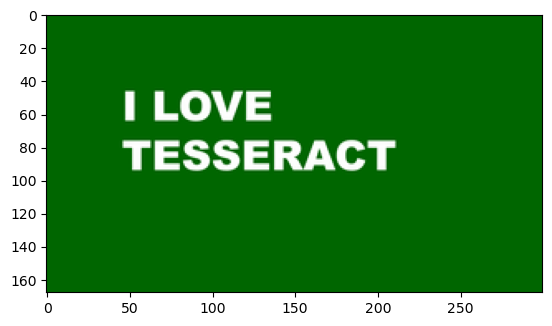

In [12]:
img = cv2.imread('OCR-300x168.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [13]:
plt.close()
print(pytesseract.image_to_string(img))

| LOVE
TESSERACT



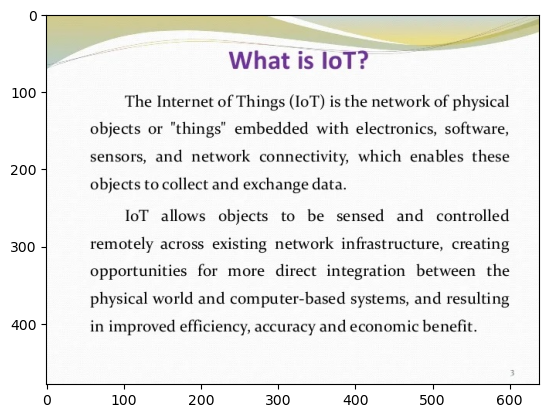

In [15]:
img1 = cv2.imread('iot.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
plt.imshow(img1)
plt.show()

In [16]:
plt.close()
print(pytesseract.image_to_string(img1))

What is loT?

The Internet of Things (IoT) is the network of physical
objects or "things" embedded with electronics, software,
sensors, and network connectivity, which enables these
objects to collect and exchange data.

IoT allows objects to be sensed and controlled
remotely across existing network infrastructure, creating
opportunities for more direct integration between the
physical world and computer-based systems, and resulting

in improved efficiency, accuracy and economic benefit.

